In [1]:
from boututils.datafile import DataFile
from boutdata.collect import collect
from boutdata.data import BoutData
import os, sys
import matplotlib
# matplotlib.use('Qt5Agg',force=True)
# matplotlib.use("TKAgg",force=True)
# matplotlib.use("widget",force=True)
import matplotlib.pyplot as plt
import xbout
import pandas as pd
import numpy as np
import pickle as pkl
import xarray as xr
import regex as re

from boutdata.restart import addvar
import glob
import shutil

import scipy

sys.path.append(r"/ssd_scratch/scripts/sdtools")


from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.neutral_transport import NeutralTransport
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from hermes3.balance1d import *
# from code_comparison.code_comparison import *


%load_ext autoreload
%autoreload 2

# IO

In [53]:
cs = dict()

db = CaseDB(
    case_dir = r"/ssd_scratch/hcases",
    grid_dir = r"/ssd_scratch/hcases"
    )

toload = [ 
    # dict(name="base", id="bl1a-1drecycling_base", guard_replace = False, unnormalise = True),  
    # dict(name="diags", id="bl1c-run_with_diags", guard_replace = False, unnormalise = True),  
    # dict(name="no_rex_rrec", id="bl2a-disable_rex_rrec", guard_replace = False, unnormalise = True), 
    # dict(name="frecycle0", id="bl2b-frecycle0", guard_replace = False, unnormalise = True), 
    # dict(name="fixbndryflux", id="bl2c-fix_boundary_flux_true", guard_replace = False, unnormalise = True), 
    # dict(name="step_loar_orig", id="spr45_nD_fimp-0-0_udens-1-86e20", guard_replace = False, unnormalise = True), 
    # dict(name="step_loar_master_minmod", id="spr45_nD_fimp-0-0_udens-1-86e20_redist_masterMinMod", guard_replace = False, unnormalise = True), 
    # dict(name="step_loar_diags_minmod", id="spr45_nD_fimp-0-0_udens-1-86e20_redist_diagsMinMod", guard_replace = False, unnormalise = True), 
    # dict(name="step_hiar", id="spr45_nD_linPow_3x_fimp-6-0-2-3_redist", guard_replace = False, unnormalise = True),  
    
    # dict(name="test_base", id="bl1c-run_with_diags_test", guard_replace = False, unnormalise = True),  
    # dict(name="test_nounpack", id="bl1cb-nounpack", guard_replace = False, unnormalise = True),  
    
    # dict(name="base", id="bl1a-1drecycling_base", guard_replace = False, unnormalise = True),  
    # dict(name="base_test", id="bl1ab-test_base", guard_replace = False, unnormalise = True),  
    # dict(name="simplify_nosetunpack", id="bl1ac-test_diags_simplify_nosetunpack", guard_replace = False, unnormalise = True),  
    
    # dict(name="fast", id="bl1ab-test_base", guard_replace = False, unnormalise = True),  
    # dict(name="slow", id="bl1al-test_base_8c45022_diffusion", guard_replace = False, unnormalise = True),  
    
    # dict(name="base", id="bl1a-1drecycling_base", guard_replace = False, unnormalise = True), 
    # dict(name="slow", id="bl3a-1drecycling_base_newmaster", guard_replace = False, unnormalise = True), 
    
    # dict(name="debug_on", id="dbf1-debug_on", guard_replace = False, unnormalise = True), 
    # dict(name="debug_off", id="dbf2-debug_off", guard_replace = False, unnormalise = True), 
    
    # dict(name="frecycle0", id="bl4a-frecycle0_nodebug_fixnoflow", guard_replace = False, unnormalise = False), 
    
    # dict(name="base", id="cvd1a-1drecycling_cvode_4cores", guard_replace = False, unnormalise = True), 
    
    # dict(name="no_outflow_mc", id="sc10g-fix_nooutflow_bc", guard_replace = False, unnormalise = True), 
    # dict(name="no_outflow_minmod", id="sc10gb-fix_nooutflow_bc_MinMod", guard_replace = False, unnormalise = True), 
    # dict(name="frecycle0_conddiags", id="bl4ab-also_cond_diags", guard_replace = False, unnormalise = True), 
    
    dict(name="base", id="bl3b-1drecycling_base_cfthr_fixnoflow", guard_replace = False, unnormalise = True),
    dict(name="base_frec0.5", id="bl3ba-frec_0.5", guard_replace = False, unnormalise = True), 
    
    # dict(name="base_2xres_0.1dymin_minmod", id="bl3bb-base_2x_res_10x_dymin_minmod", guard_replace = False, unnormalise = True), 
    
    # dict(name="base_1xres_0.25dymin", id="bl3bc-base_1x_res_0.25x_dymin", guard_replace = False, unnormalise = True), 
    
    # dict(name="nooutflow_minmod", id="sc10gb-fix_nooutflow_bc_MinMod", guard_replace = False, unnormalise = True), 
    
    # dict(name="base", id="bl3b-1drecycling_base_cfthr_fixnoflow", guard_replace = False, unnormalise = True),
    # dict(name="base_newdiags", id="bl3c-1drecycling_base_fixNVi_flowdiags", guard_replace = False, unnormalise = True),
    
    # dict(name="nooutflow_newdiags", id="sc10h-fix_nooutflow_bc_MinMod_fixNVi_newdiags", guard_replace = False, unnormalise = True), 
    # dict(name="nooutflow_soundspeed", id="sc10hi-add_sound_speed_comp", guard_replace = False, unnormalise = True), 
    # dict(name="nooutflow_edynamics", id="sc10hj-also_electron_dynamics", guard_replace = False, unnormalise = True), 
    
    # dict(name="base_newdiags", id="bl3c-1drecycling_base_fixNVi_flowdiags", guard_replace = False, unnormalise = True),

]

for case in toload:
    cs[case["name"]] = Load.case_1D(db.casepaths[case["id"]], guard_replace = case["guard_replace"], unnormalise = case["unnormalise"])
    cs[case["name"]].ds.load()

/ssd_scratch/scripts/.venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Skipping unnormalisation


/ssd_scratch/scripts/.venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Skipping unnormalisation


# Case comparison

In [50]:
%matplotlib inline

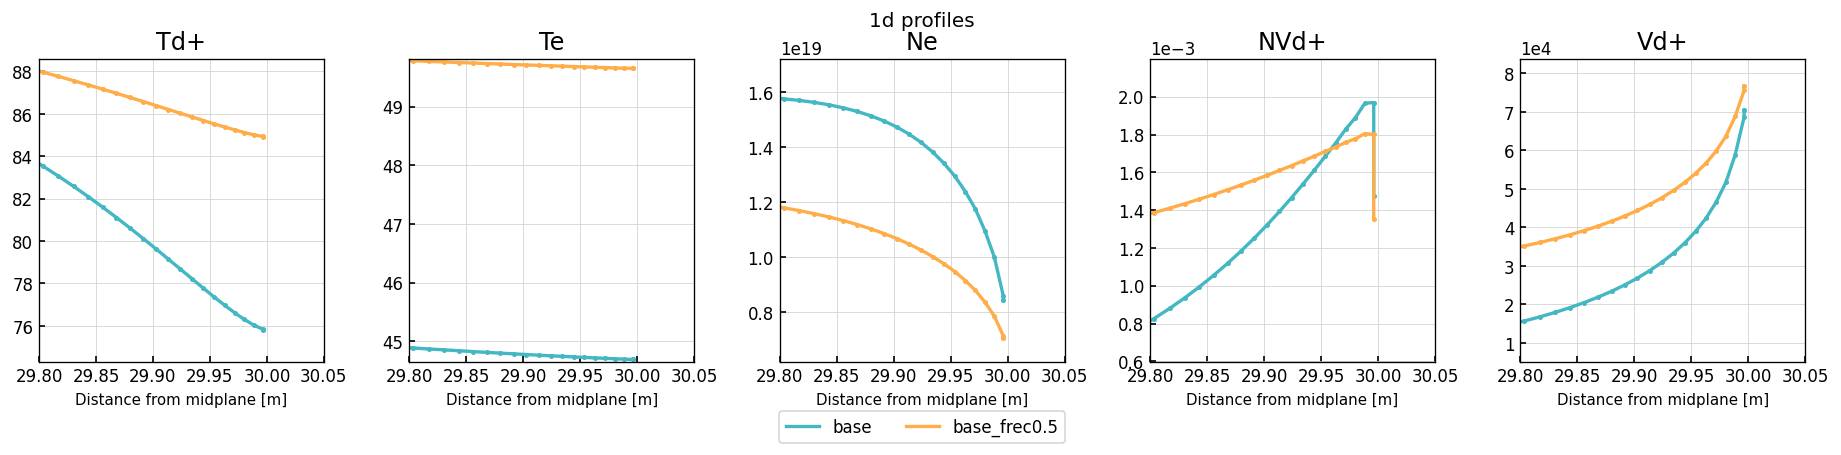

In [56]:
toplot = {}
for name in cs:
# for name in ["diags"]:
    ds = cs[name].ds
    if "t" in ds.dims:
        ds = ds.isel(t=-1)
    toplot[name] = ds

lineplot(
    toplot,
    clean_guards = False,
    params = ["Td+", "Te", "Ne", "NVd+", "Vd+",
            #   "ParticleFlow_d+_ylow"
              ],
    # params = ["Td"],
    regions = ["1d"],
    # xlims=(9.5,10.1),
    xlims=(29.8, 30.05 ),
    guard_replace = True
    # xlims=(0,1)
)

In [48]:
cs["nooutflow_edynamics"].ds.isel(t=-1)["NVd+"][-5:].values

array([6.47526455e-05, 6.04430918e-05, 2.88277536e-05, 2.16208152e-05,
       0.00000000e+00])

In [44]:
cs.keys()

dict_keys(['nooutflow_newdiags', 'nooutflow_soundspeed', 'nooutflow_edynamics'])

In [14]:
(1+0.24)/(1+4.2) * 13.58 * 3/4 * np.pi

7.630082742162871

# Performance

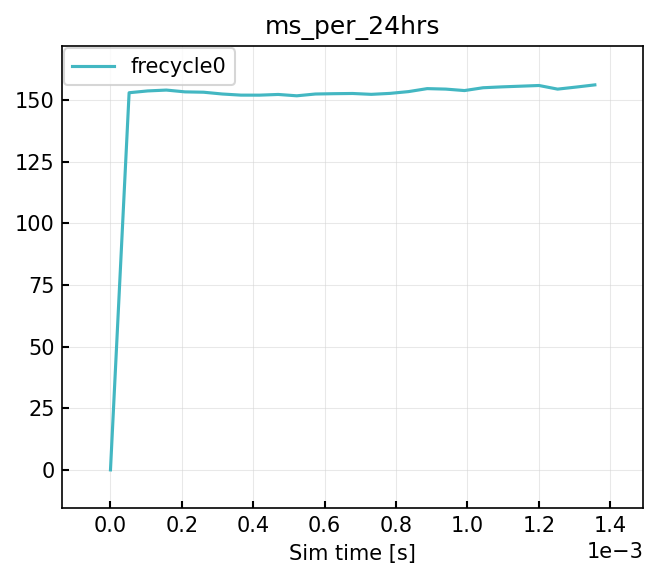

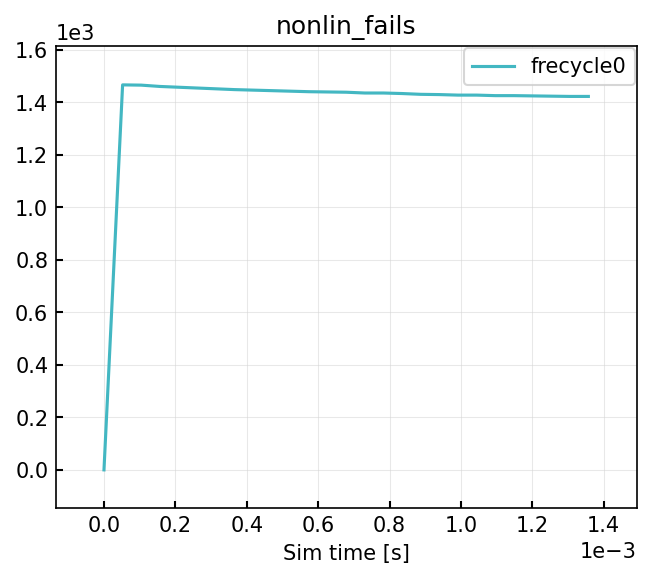

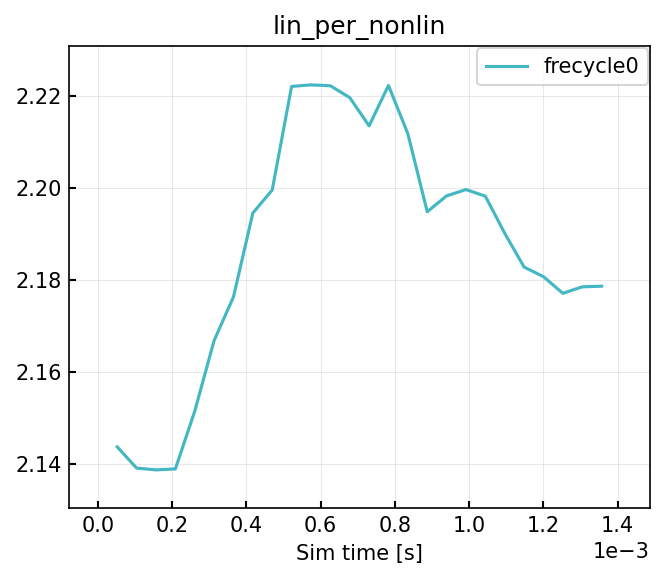

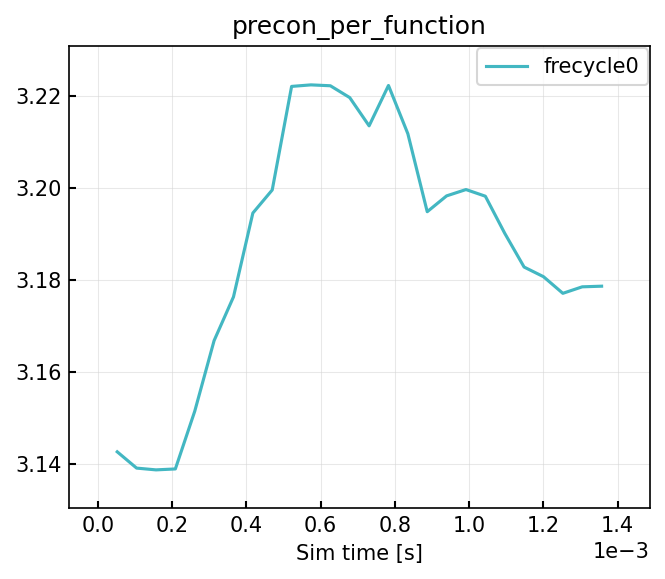

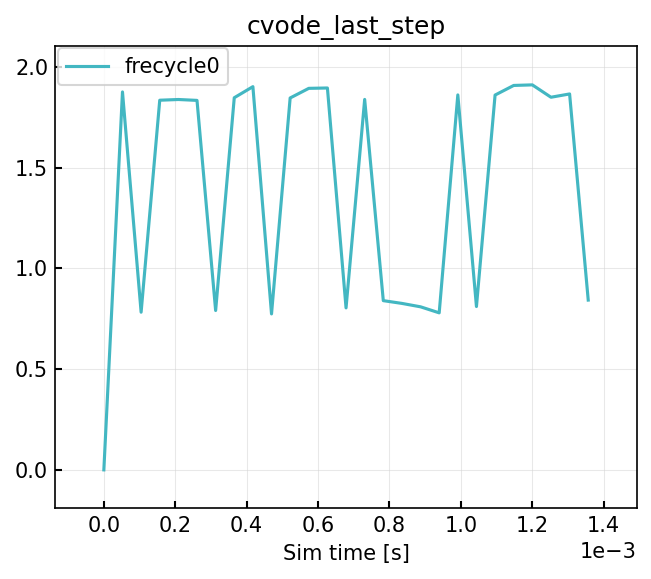

In [62]:
plot_cvode_performance(cs)

# Convergence

In [31]:
cs.keys()

dict_keys(['nooutflow_newdiags', 'nooutflow_soundspeed', 'nooutflow_edynamics'])

In [33]:
%matplotlib widget

(3.0, 10.02)

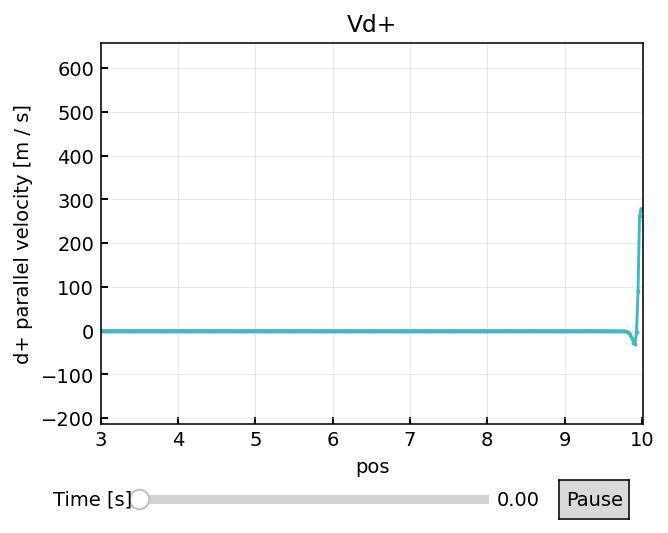

In [42]:
plt.close("all")

ds = cs["nooutflow_edynamics"].ds.isel(pos=slice(2,-2))

param = "Vd+"
fig, ax = plt.subplots()
anim = xbout.plotting.animate.animate_line(ds[param], ax = ax, marker = "o", ms = 1)
ax.set_xlim(3, 10.02)
# ax.set_yscale("symlog", linthresh = 1e16)
# ax.set_ylim(-2e18, 3e18)


In [4]:
cs.keys()

dict_keys(['base_1xres_0.25dymin'])

In [12]:
%matplotlib inline

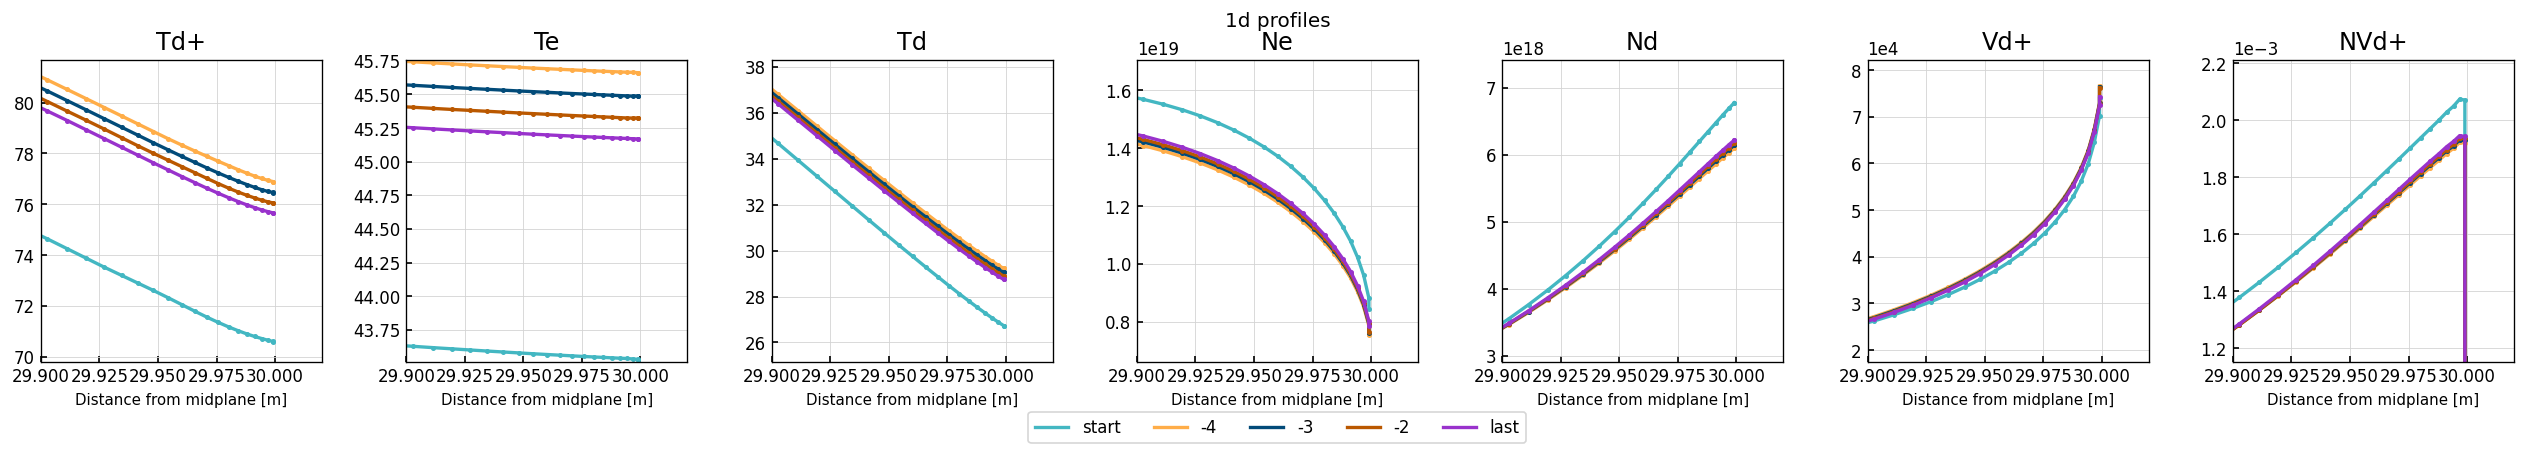

In [4]:
case = "base_1xres_0.25dymin"

lineplot(
    {
        "start":cs[case].ds.isel(t=0),
        "-4":cs[case].ds.isel(t=-4),
        "-3":cs[case].ds.isel(t=-3),
        "-2":cs[case].ds.isel(t=-2),
        "last":cs[case].ds.isel(t=-1),

    },
    clean_guards = False,
    guard_replace = True,
    params = ["Td+", "Te", "Td", "Ne", "Nd", "Vd+", "NVd+"],
    regions = ["1d"],
    lw = 2,
    # markersize = 0,
    xlims = (29.9, 30.02)
    # xlims = (0,1)
)

# Balances

In [4]:
cs.keys()

dict_keys(['nooutflow_newdiags'])

In [9]:
(3.5-2.5)/3.5

0.2857142857142857

Warning! Sd_src not found, results may be incorrect
Warning! Sd+_feedback not found, results may be incorrect
Warning! Sd+_iz not found, results may be incorrect
Warning! Sd+_rec not found, results may be incorrect
Warning! Sd_target_recycle not found, results may be incorrect
Warning! Pd_src not found, results may be incorrect
Warning! Rd+_ex not found, results may be incorrect
Warning! Rd+_rec not found, results may be incorrect
Warning! Rar not found, results may be incorrect
Warning! Ed_target_recycle not found, results may be incorrect
|||WARNING: Overwriting sheath diagnostics with calculated values


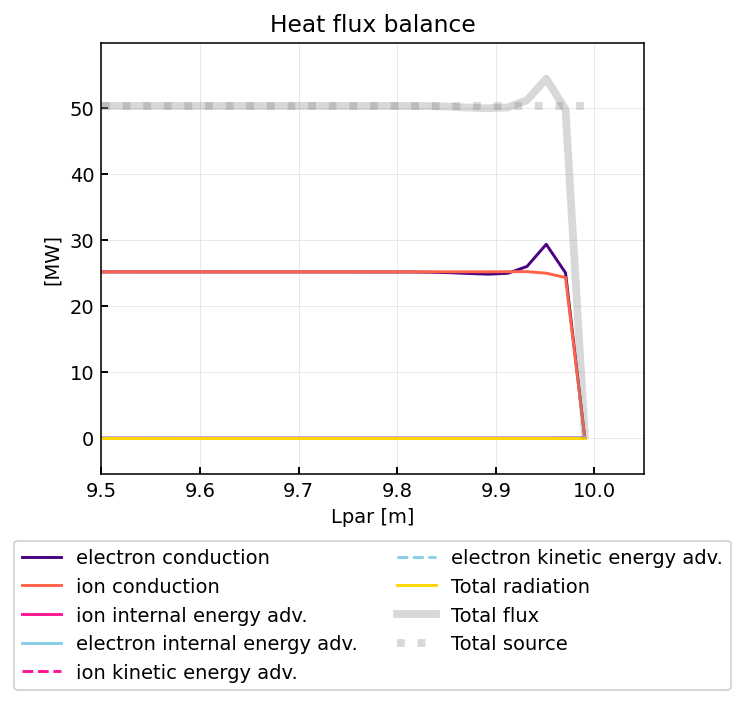

In [17]:
self = Balance1D(
    cs["nooutflow_newdiags"].ds, 
    ignore_errors = True, 
    normalised = False, 
    use_sheath_diagnostic = False
    )


self.get_terms()
# self.reconstruct_sheath_fluxes()
# self.print_sheath_conditions()
self.get_tallies()


self.plot_flux_balance(
    use_diagnostics = True, 
    # flux_style = dict(marker = "o", ms = 2),
    # xlims = (29.9, 30.01)
    xlims = (9.5, 10.05)
    )
# self.plot_heat_balance()
# self.print_balances()

In [6]:
ds = cs["nooutflow_newdiags"].ds.isel(t=-1)
guard = ds.isel(pos=-2)

diag_hfe_cond = guard["ConductionFlow_e_ylow"].values * 1e-6
diag_hfi_cond = guard["ConductionFlow_d+_ylow"].values * 1e-6

diag_hfe_adv = (guard["EnergyFlow_e_ylow"].values - guard["ConductionFlow_e_ylow"].values) * 1e-6
diag_hfi_adv = (guard["EnergyFlow_d+_ylow"].values - guard["ConductionFlow_d+_ylow"].values) * 1e-6

hfe = self.hbal["Ee_sheath"][-1] * -1
hfi = self.hbal["Ed+_sheath"][-1] * -1

ds.data_vars

print("Electrons")
print(f"  Diagnostic conduction = {diag_hfe_cond:.2f} [MW]")
print(f"  Diagnostic advection  = {diag_hfe_adv:.2f} [MW]")
print(f"  Diagnostic total      = {diag_hfe_cond + diag_hfe_adv:.2f} [MW]")
print(f"  Calculation total     = {hfe:.2f} [MW]")

print("Ions")
print(f"  Diagnostic conduction = {diag_hfi_cond:.2f} [MW]")
print(f"  Diagnostic advection  = {diag_hfi_adv:.2f} [MW]")
print(f"  Diagnostic total      = {diag_hfi_cond + diag_hfi_adv:.2f} [MW]")
print(f"  Calculation total     = {hfi:.2f} [MW]")


diag_hfi_adv


Electrons
  Diagnostic conduction = 0.00 [MW]
  Diagnostic advection  = 25.08 [MW]
  Diagnostic total      = 25.08 [MW]
  Calculation total     = 25.08 [MW]
Ions
  Diagnostic conduction = 0.00 [MW]
  Diagnostic advection  = 25.03 [MW]
  Diagnostic total      = 25.03 [MW]
  Calculation total     = 0.00 [MW]


25.028126297245368

(9.0, 10.1)

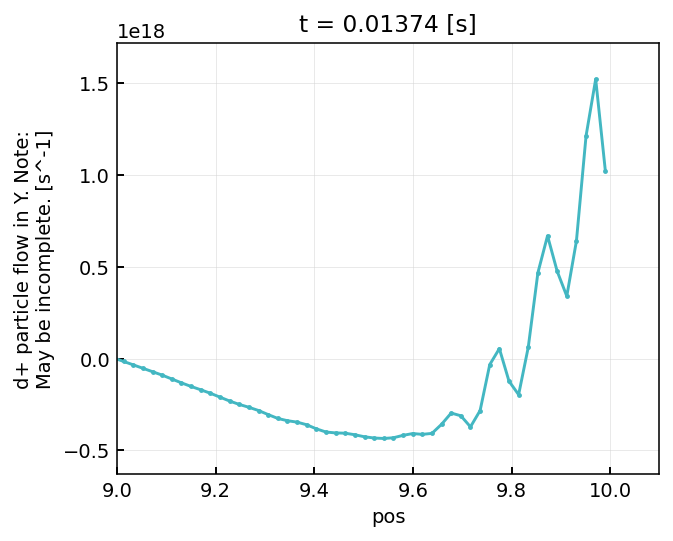

In [26]:
ds = cs["nooutflow_soundspeed"].ds.isel(t=-1, pos=slice(2,-2))

fig, ax = plt.subplots()

style = dict(marker = "o", ms = 1.5)
ds["ParticleFlow_d+_ylow"].plot(ax=ax, label="Particle flow", **style)

ax.set_xlim(9,10.1)

In [59]:
print("Ion particle flux")
print(f'  Diagnostic:  {self.pbal["Sd+_sheath"]:.4f}')
print(f'  Calculation: {self.sheath["pfi"]:.4f}')
print("")

print("Ion energy flux")
print(f'  Diagnostic:  {self.hbal["Ed+_sheath"]:.4f}')
print(f'  Calculation: {self.sheath["hfi"]:.4f}')
print("")

print("Electron energy flux")
print(f'  Diagnostic:  {self.hbal["Ee_sheath"]:.4f}')
print(f'  Calculation: {self.sheath["hfe"]:.4f}')
print("")



Ion particle flux
  Diagnostic:  -3752252.7369
  Calculation: -3752252.7369

Ion energy flux
  Diagnostic:  -7.0479
  Calculation: -7.0479

Electron energy flux
  Diagnostic:  -7.5018
  Calculation: -7.5018



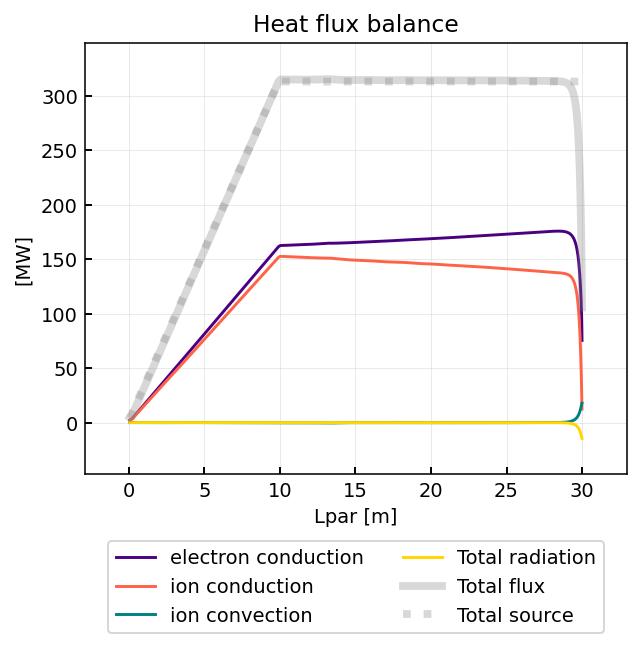

Ed_src is zero, dropping
Rar is zero, dropping


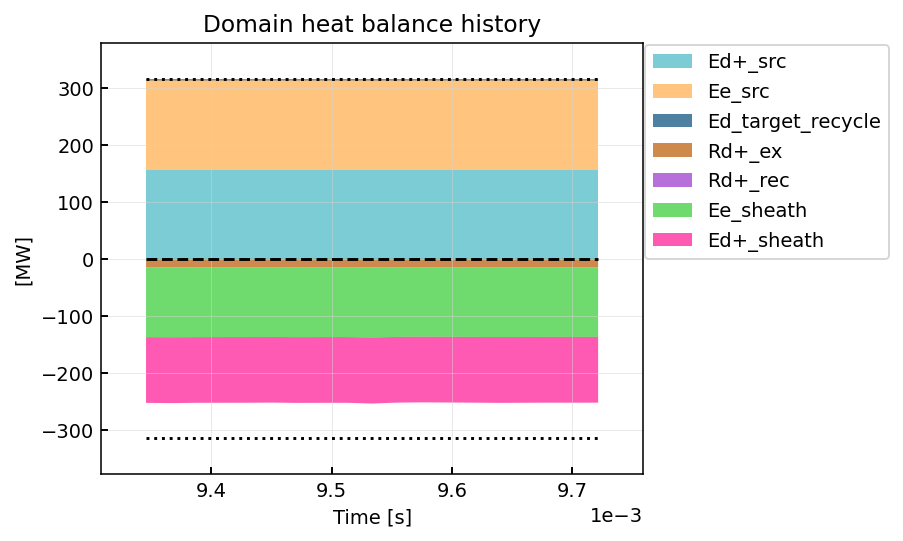

In [45]:
ds = self.ds

radiation_vars = []
for param in self.ds:
    if param.startswith("R"):
        print(param)
        radiation_vars.append(ds[param])
        
radiation_vars = xr.concat(radiation_vars, dim = "pos").sum(dim="pos")
radiation_vars

Rd+_ex
Rd+_rec


/ssd_scratch/scripts/.venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


<xarray.DataArray 'Rd+_ex' (t: 19)>
array([-1.88780518e+08, -1.89151418e+08, -1.88470765e+08, -1.88329794e+08,
       -1.88150545e+08, -1.87674523e+08, -1.88053211e+08, -1.87844654e+08,
       -1.87769907e+08, -1.89140670e+08, -1.87275388e+08, -1.86683743e+08,
       -1.86903291e+08, -1.86947233e+08, -1.87250199e+08, -1.87177469e+08,
       -1.86878449e+08, -1.86821048e+08, -1.86693791e+08])
Coordinates:
  * t        (t) float64 0.009346 0.009366 0.009387 ... 0.009701 0.009721
Attributes:
    current_time_index:  19
    cell_location:       CELL_CENTRE
    conversion:          15346982899.153515
    direction_y:         Standard
    direction_z:         Standard
    long_name:           Radiation loss due to ionisation of d to d+
    source:              amjuel_hyd_ionisation
    standard_name:       radiation loss
    time_dimension:      t
    units:               W / m^3
    metadata:            {'BOUT_VERSION': 5.2, 'Bnorm': 1.0, 'Cs0': 97871.514...
    options:             # 1D system with:\n#  - no-flow boundary on lower Y ...
    geometry:            
    units_type:          SI

## Reconstruct diagnostics 

In [53]:
# ds = ds["frecycle0"].ds

self.get_properties()
ds = self.ds
qe = self.qe
Zi = self.Zi
Mi = self.Mi
Me = self.Me
Ge = self.Ge
sheath_ion_polytropic = self.sheath_ion_polytropic
phi_wall = 0

dasheath = self.get_target_value(ds["da"])
dv = ds.isel(pos=-3)["dv"].values

visheath = self.get_target_value(ds["Vd+"])
vesheath = self.get_target_value(ds["Ve"])

nesheath = self.get_target_value(ds["Ne"])
nisheath = self.get_target_value(ds["Nd+"])

tesheath = self.get_target_value(ds["Te"])
tisheath = self.get_target_value(ds["Td+"])

cssheath = np.sqrt((sheath_ion_polytropic * tisheath*qe + Zi * tesheath*qe) / Mi)   # [m/s] Bohm criterion sound speed

ion_sum = Zi * nisheath * cssheath   # Sheath current
phisheath = tesheath * np.log(np.sqrt(tesheath / (Me * 2*np.pi)) * (1 - Ge) * nesheath / ion_sum)   # [V] sheath potential, (note Neumann BC)
vesheath = np.sqrt(tesheath / (2*np.pi * Me)) * (1 - Ge) * np.exp(-(phisheath - phi_wall)/tesheath)


pfi_sheath = -1 * visheath * nisheath * dasheath   # [s^-1] ion particle flux into domain 
pfe_sheath = -1 * vesheath * nesheath * dasheath   # [s^-1] electron particle flux into domain 


hfi_sheath = pfi_sheath * (self.gamma_i * tisheath*qe + 0.5*Mi*cssheath**2) * 1e-6   # [MW] electron heat flux into domain
hfe_sheath = pfe_sheath * (self.gamma_e * tesheath*qe + 0.5*Me*vesheath**2) * 1e-6   # [MW] electron heat flux into domain

q = ((self.gamma_e - 2.5) * tesheath - 0.5 * Me * vesheath**2) * nesheath * vesheath

self.hbal["Ee_sheath"] = hfe_sheath 
self.hbal["Ed+_sheath"] = hfi_sheath
self.get_tallies()

print(f"phisheath = {phisheath:.6f}")
print(f"phi_wall = {phi_wall:.6f}")
print(f"Me = {Me:.6f}")
print(f"gamma_e = {self.gamma_e:.1f}")
print(f"tesheath = {tesheath:.6f}")
print(f"nesheath = {nesheath:.6f}")
print(f"vesheath = {vesheath:.6f}")
print(f"q_e = {q:.6f}")
print(f"da = {dasheath:.5e}")
print(f"dv = {dv:.5e}")


hfe_sheath.values
# 

1.7425008415486056
phisheath = 1.742501
phi_wall = 0.000000
Me = 0.000545
gamma_e = 4.5
tesheath = 0.637524
nesheath = 0.410922
vesheath = 0.887330
q_e = 0.464834
da = 6.01856e+06
dv = 4.51724e+07


array(-6.29620313)

In [43]:
np.log(np.sqrt(tesheath ) * (1 - Ge) * nesheath).values

array(-inf)

In [44]:
tesheath

<xarray.DataArray 'Te' ()>
array(0.63752399)
Coordinates:
    dx       float64 9.579e+05
    dz       float64 6.283
Attributes:
    current_time_index:  1
    cell_location:       CELL_CENTRE
    conversion:          100.0
    direction_y:         Standard
    direction_z:         Standard
    long_name:           e temperature
    source:              evolve_pressure
    species:             e
    standard_name:       temperature
    time_dimension:      t
    units:               eV
    metadata:            {'BOUT_VERSION': 5.2, 'Bnorm': 1.0, 'Cs0': 97871.514...
    options:             # 1D system with:\n#  - no-flow boundary on lower Y ...
    geometry:            
    units_type:          hermes

In [ ]:
# hfe_sheath = self.gamma_i * pfi_sheath * tisheath*qe * 1e-6   # [MW] electron heat flux into domain
# pf_sheath[-1]

# fig, axes = plt.subplots(1,3, figsize = (10,3))
# t = ds["t"]


# ax = axes[0]
# ax.plot(t, pfi_sheath, label = "Calculation")
# ax.plot(t, self.pbal["Sd+_sheath"], label = "Hermes-3 diagnostic")
# ax.set_title("Sheath particle flow")

# ax = axes[1]
# ax.plot(t, hfi_sheath, label = "Calculation")
# ax.plot(t, self.hbal["Ed+_sheath"], label = "Hermes-3 diagnostic")
# ax.set_title("Sheath ion heat flow [s]")

# ax = axes[2]
# ax.plot(t, hfe_sheath, label = "Calculation")
# ax.plot(t, self.hbal["Ee_sheath"], label = "Hermes-3 diagnostic")
# ax.set_title("Sheath electron heat flow [s]")

# ax.set_yscale("symlog")

# for ax in axes:
#     ax.legend(fontsize = "x-small")

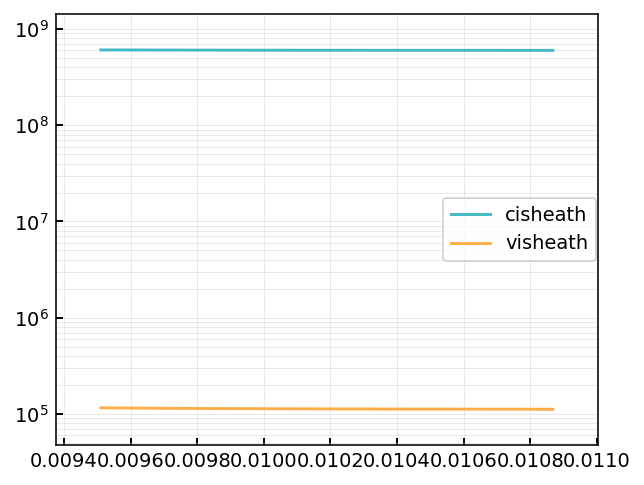

In [86]:
cisheath = np.sqrt(1*tisheath + tesheath)*constants("q_e")/(constants("mass_p") * 2)
# cisheath = np.sqrt(1*tisheath)*constants("q_e")/(constants("mass_p") * 2)

fig, ax =plt.subplots()
ax.plot(t, cisheath, label = "cisheath")
ax.plot(t, visheath, label = "visheath")
ax.legend()
ax.set_yscale("log")

# Balances Matt

In [15]:
dataSets = {}

def loadData(fileName,dataSets,folderPath,filePath):
    #----- Load data
    print(os.path.join(folderPath,filePath))
    ds = Load.case_1D(os.path.join(folderPath,filePath),use_squash=True,verbose=True).ds     # Load, extract, normalise, and guard replace outputs
    ds = ds.isel(pos=slice(2,-2))                                                            # Crop off outer and inner guard cells
    
    #----- Time manipulating
    ds["t"] = ds["t"]*1e3                                                                    # Convert t into ms from s
    ds["timeNorm"] = ds["t"].values-ds["t"].values[0]                                        # Set t[0]==0

    #----- Input Powers
    electronInput = (3./2.)*(ds["Pe_src"] *ds["dv"])                                         # Pe_src is in Pa.s^-1 which is J.m^-3.s^-1 = W.m^-3
    ionInput      = (3./2.)*(ds["Pd+_src"]*ds["dv"])
    ds["electronInputSum"] = electronInput.sum("pos")
    ds["ionInputSum"]      = ionInput.sum("pos")
    ds["totalPowInput"]    = ds["electronInputSum"]+ds["ionInputSum"]

    #----- Detachment Front Position
    tempVal    = 5.0 # eV
    tempMean   = (ds["Te"].values+ds["Td+"].values)/2.
    xInterp    = np.linspace(ds["pos"].values[0],ds["pos"].values[-1],int(10.*len(ds["pos"].values)))
    interpFunc = interp1d(ds["pos"].values,tempMean,axis=1)
    tempMeanHR = interpFunc(xInterp)
    ds["detLoc"] = ds["pos"].values[-1]-xInterp[np.argmin(np.abs(tempMeanHR-tempVal),axis=1)]
    ds["detLocRaw"] = ds["pos"].values[-1]-ds["pos"].values[np.argmin(np.abs(tempMean-tempVal),axis=1)]
    
    #----- Final timestep
    finalTime = 1e-3*ds["t"].values[-1]/ds["t"].attrs["conversion"]
    print(fileName,"Final timestep to be used for time dependent power: ",finalTime)

    #----- Total Pressures
    ds["Pp"] = ds["Pe"]+ds["Pd+"]

    ds["totalRadArPow"]    = ds["Rar"]*ds["dv"]
    ds["totalRadArPowSum"] = ds["totalRadArPow"].sum("pos")

    #----- Radiation losses
    totalRar  =  np.abs((ds["dv"]*ds["Rar"]).sum("pos"))
    totalRex  =  np.abs((ds["dv"]*ds['Rd+_ex']).sum("pos"))
    totalRrec = -np.abs((ds["dv"]*ds['Rd+_rec']).sum("pos"))
    totalRrad = (totalRar.values+totalRex.values+totalRrec.values)
    ds["totalRar"]  = totalRar
    ds["totalRex"]  = totalRex
    ds["totalRrec"] = totalRrec
    ds["totalRrad"] = totalRrad

    dataSets[fileName] = ds
    return dataSets

In [ ]:
folderPath = "/path/to/file/"

filePaths = ["spr45_nD_fimp-0-0_udens-1-86e20",
             "spr45_nD_linPow_3x_fimp-6-0-2-3"]
fileNames = ["fimp-0-0",
             "fimp-6-0"]

for filePath,fileName in zip(filePaths,fileNames):
    dataSets = loadData(fileName,dataSets,folderPath,filePath)

# Cross-check with collect

In [5]:

def get_var(name):
    return collect(name, path=r"/ssd_scratch/hcases/balances1d/bl1a-1drecycling_base", yguards = True, info = False, tind = -1)

d = {}
for param in ["NVd+", "Pd+_src", "Pe_src", "dx", "dy", "dz", "J", "Nnorm", "Tnorm", "rho_s0"]:
    d[param] = get_var(param).squeeze()
    
d["Pnorm"] = d["Nnorm"]*d["Tnorm"]*constants("q_e")

d["dv"] = d["dx"]*d["dy"]*d["dz"]*d["J"]#* (d["rho_s0"]**3)

d["Pd+_src"] *= d["Pnorm"]
d["Pe_src"] *= d["Pnorm"]


In [9]:

def get_var(name):
    return collect(name, path=r"/ssd_scratch/hcases/balances1d/bl1ai-test_base_new_master", yguards = True, info = False, tind = -1)

d = {}
for param in ["NVd+"]:
    d[param] = get_var(param).squeeze()

d["NVd+"][-5:]

BoutArray([ 1.03136853,  1.07495699,  1.0713104 , -1.0713104 ,
            0.        ])

In [37]:


Pi = (d["Pd+_src"] * d["dv"])[2:-2].sum() * 1e-6 * 3/2

Pi

BoutArray(1533.05464096)

In [ ]:
# Pd+_src: 1.566e+02
# Pe_src: 1.566e+02

In [17]:
d["dv"]

KeyError: 'dv'

Pd_src is zero, dropping
Rd+_ex is zero, dropping
Rd+_rec is zero, dropping
Rar is zero, dropping
Ed_target_recycle is zero, dropping


AttributeError: 'Dataset' object has no attribute 't'

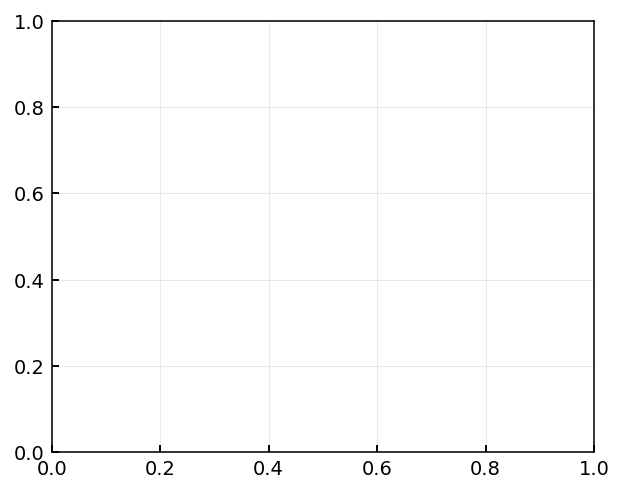

In [9]:
fig, ax = plt.subplots()

pos = {}
neg = {}

for key in self.hbal:
    
    if self.time:
        val = self.hbal[key][-1]
    else:
        val = self.hbal[key]
    
    if val > 0:
        pos[key] = self.hbal[key]
    elif val < 0:
        neg[key] = self.hbal[key]
    else:
        print(f"{key} is zero, dropping")

# pos = {k: v for k, v in sorted(pos.items(), key=lambda item: item[1])}


        
t = self.ds.t
ax.stackplot(t, list(pos.values()), labels = pos.keys(), baseline = "zero", alpha = 0.7)
ax.stackplot(t, list(neg.values()), labels = neg.keys(), baseline = "zero", alpha = 0.7)
ax.hlines(0, t[0], t[-1], color = "k", linestyle = "--")

ax.legend(loc = "upper left", bbox_to_anchor = (1,1))
ax.set_ylabel("[MW]")
ax.set_xlabel("Time [s]")
# Pd+_src: 1.566e+02
# Pe_src: 1.566e+02
# Pd_src: 0.000e+00
# Rd+_ex: -9.589e+00
# Rd+_rec: -5.753e-04
# Ed_target_recycle: 1.372e+00
# Ee_sheath: -1.081e+02
# Ed+_sheath: -1.002e+02

# Check cell fluxes against sources

In [5]:
cs.keys()

dict_keys(['no_outflow_conddiags'])

In [5]:
cs.keys()

dict_keys(['frecycle0_conddiags'])

Text(0.5, 1.0, 'Heat flux for base')

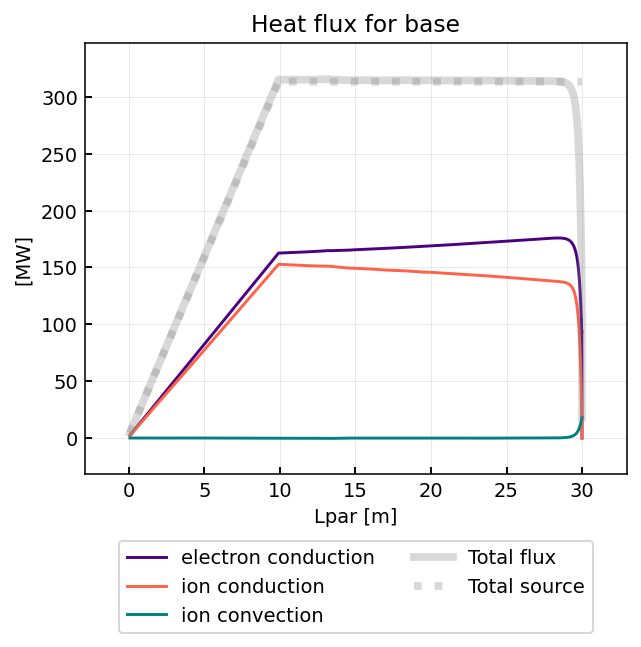

In [28]:
case = "base"

ds = cs[case].ds.isel(t=-1, pos = slice(2,-2))

src_i = ((ds["Pd+_src"]) * ds["dv"]).cumsum("pos") * 1e-6 * 3/2
src_e = ((ds["Pe_src"]) * ds["dv"]).cumsum("pos") * 1e-6 * 3/2
src_tot = src_i + src_e

# hfe_cond = 2293.8117*ds["Te"]**(5/2)*np.gradient(ds["Te"], ds["pos"]) * -1e-6
hfe_cond = ds["kappa_par_e"] * np.gradient(ds["Te"], ds["pos"]) * ds["da"] * -1e-6 #* 1e-2
hfi_cond = ds["kappa_par_d+"] * np.gradient(ds["Td+"], ds["pos"]) * ds["da"] * -1e-6 #* 1e-2
hfi_conv = ds["Vd+"] * ds["Pd+"] * 5/2  * 1e-6


# hfe_cond2 = scipy.integrate.cumulative_trapezoid(ds["ConductionDiv_e_par"], ds["pos"], initial = 0) * ds["da"] * -1e-6 
hfi_cond = (ds["div_cond_par_d+"] * ds["dv"]).cumsum("pos") * -1e-6 
hfe_cond = (ds["div_cond_par_e"] * ds["dv"]).cumsum("pos") * -1e-6 

hf_tot = hfe_cond + hfi_cond + hfi_conv

fig, ax = plt.subplots()
style_src = dict(lw = 1, ls = "--")
ax.plot(ds["pos"], hfe_cond, c = "indigo", label = "electron conduction")
ax.plot(ds["pos"], hfi_cond, c = "tomato", label = "ion conduction")
ax.plot(ds["pos"], hfi_conv, c = "teal", label = "ion convection")
ax.plot(ds["pos"], hf_tot, c = "grey", label = "Total flux", alpha = 0.3, lw = 4)
# ax.plot(ds["pos"], src_e, label = "Electron source", c = "indigo", **style_src)
# ax.plot(ds["pos"], src_i, label = "Ion source", c = "tomato", **style_src)
ax.plot(ds["pos"], src_tot, label = "Total source", c = "grey", alpha = 0.3, lw = 4, ls = ":")
# ax.set_ylim(-5, ax.get_ylim()[1])
ax.legend(loc = "upper center", bbox_to_anchor=(0.5,-0.15), ncols = 2)
# ax.set_xlim(29,30.2)
ax.set_xlabel("Lpar [m]")
ax.set_ylabel("[MW]")
ax.set_title(f"Heat flux for {case}")

In [13]:
src

<xarray.DataArray (pos: 400)>
array([  4.47146809,   8.93233331,  13.38259566,  17.82225512,
        22.25131172,  26.66976543,  31.07761628,  35.47486424,
        39.86150934,  44.23755155,  48.6029909 ,  52.95782736,
        57.30206095,  61.63569167,  65.95871951,  70.27114448,
        74.57296657,  78.86418578,  83.14480212,  87.41481559,
        91.67422618,  95.92303389, 100.16123873, 104.38884069,
       108.60583978, 112.812236  , 117.00802933, 121.1932198 ,
       125.36780739, 129.5317921 , 133.68517394, 137.8279529 ,
       141.96012899, 146.0817022 , 150.19267253, 154.29304   ,
       158.38280458, 162.46196629, 166.53052513, 170.58848109,
       174.63583418, 178.67258439, 182.69873172, 186.71427618,
       190.71921777, 194.71355648, 198.69729231, 202.67042527,
       206.63295535, 210.58488256, 214.52620689, 218.45692835,
       222.37704694, 226.28656264, 230.18547548, 234.07378543,
       237.95149252, 241.81859672, 245.67509805, 249.52099651,
       253.35629209, 257.1809848 , 260.99507463, 264.79856159,
       268.59144567, 272.37372687, 276.1454052 , 279.90648066,
       283.65695324, 287.39682294, 291.12608977, 294.84475372,
       298.5528148 , 302.25027301, 305.93712834, 309.61338079,
       313.27903037, 313.27903037, 313.27903037, 313.27903037,
...
       313.27903037, 313.27903037, 313.27903037, 313.27903037,
       313.27903037, 313.27903037, 313.27903037, 313.27903037,
       313.27903037, 313.27903037, 313.27903037, 313.27903037,
       313.27903037, 313.27903037, 313.27903037, 313.27903037,
       313.27903037, 313.27903037, 313.27903037, 313.27903037,
       313.27903037, 313.27903037, 313.27903037, 313.27903037,
       313.27903037, 313.27903037, 313.27903037, 313.27903037,
       313.27903037, 313.27903037, 313.27903037, 313.27903037,
       313.27903037, 313.27903037, 313.27903037, 313.27903037,
       313.27903037, 313.27903037, 313.27903037, 313.27903037,
       313.27903037, 313.27903037, 313.27903037, 313.27903037,
       313.27903037, 313.27903037, 313.27903037, 313.27903037,
       313.27903037, 313.27903037, 313.27903037, 313.27903037,
       313.27903037, 313.27903037, 313.27903037, 313.27903037,
       313.27903037, 313.27903037, 313.27903037, 313.27903037,
       313.27903037, 313.27903037, 313.27903037, 313.27903037,
       313.27903037, 313.27903037, 313.27903037, 313.27903037,
       313.27903037, 313.27903037, 313.27903037, 313.27903037,
       313.27903037, 313.27903037, 313.27903037, 313.27903037,
       313.27903037, 313.27903037, 313.27903037, 313.27903037])
Coordinates:
    dx       (pos) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0 1.0
    dy       (pos) float64 0.1423 0.142 0.1417 ... 0.008344 0.008006 0.007669
    dz       (pos) float64 6.283 6.283 6.283 6.283 ... 6.283 6.283 6.283 6.283
    t        float64 0.0146
    y        (pos) float64 0.3568 0.499 0.6408 0.7823 ... 30.27 30.27 30.28
  * pos      (pos) float64 0.07125 0.2134 0.3552 0.4967 ... 29.98 29.99 30.0
Attributes:
    current_time_index:  95
    cell_location:       CELL_CENTRE
    conversion:          15346982899.153515
    direction_y:         Standard
    direction_z:         Standard
    long_name:           d+ pressure source
    source:              evolve_pressure
    species:             d+
    standard_name:       pressure source
    time_dimension:      t
    units:               Pa s^-1
    metadata:            {'BOUT_VERSION': 5.2, 'Bnorm': 1.0, 'Cs0': 97871.514...
    options:             # 1D system with:\n#  - no-flow boundary on lower Y ...
    geometry:            
    units_type:          SI

In [68]:
pos = sorted(pos.items(), key=lambda x: x[1][-1])